### Part 1 - Cleaning Data

#### The data from 3 ranking systems needs to be cleaned and we need to standardize the names of Universities for all ranking systems based on which can merge data

In [1]:
#importing libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import re
import math
from scipy import stats
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.patches as mpatches

# Setting options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

In [2]:
# Obtaining rankings from US News for 2014

get_data = False

if(get_data):
    from bs4 import BeautifulSoup; #import beautiful soup scraper
    import urllib #url library
    import re #regular expression package

    # This link has US News rankings for world universities for 2014
    site= "https://www.washingtonpost.com/apps/g/page/local/us-news-global-top-500-universities/1409/"
    # Setting headers to request data without Error 403: Forbidden
    hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
           'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           'Accept-Encoding': 'none',
           'Accept-Language': 'en-US,en;q=0.8',
           'Connection': 'keep-alive'}

    # Requesting data from url and reading it using Beautiful Soup
    req = urllib.request.Request(site, headers=hdr)
    try: page = urllib.request.urlopen(req)
    except(urllib2.HTTPError, e): print(e.fp.read())
    bs_page = BeautifulSoup(page.read(), "html.parser")

    # Extracting required data
    name = [row.text for row in bs_page.find_all('td', {"class": "Name-cell"})]
    country = [row.text for row in bs_page.find_all('td', {"class": "Country-cell"})]
    region = [row.text for row in bs_page.find_all('td', {"class": "Region-cell"})]
    rank = [row.text for row in bs_page.find_all('td', {"class": "Overall Rank-cell"})]

    # Inserting data in dataframe and saving results
    usnews_df = pd.DataFrame({'university_name': name, 'country': country, 'region': region, 'rank' : rank})
    usnews_df.to_csv('dataUSNews.csv')
    
else: print('Load US News data from file')

Load US News data from file


In [3]:
# Loading data 
times_df = pd.read_csv('dataTimes.csv')
cwur_df = pd.read_csv('dataCWUR.csv')
shanghai_df = pd.read_csv('dataShanghai.csv')
usnews_df = pd.read_csv('dataUSNews.csv', encoding = "ISO-8859-1")

In [4]:
# Cleaning data

usnews_df = usnews_df.replace(re.compile('--'), ', ')
usnews_df = usnews_df.replace("University of Michigan", "University of Michigan, Ann Arbor")
usnews_df = usnews_df.replace("University of Texas, Austin", "University of Texas at Austin")
usnews_df = usnews_df.replace("University of North Carolina, Chapel Hill", "University of North Carolina at Chapel Hill")
usnews_df = usnews_df.replace("University of Illinois Urbana-Champaign", "University of Illinois at Urbana-Champaign")
usnews_df = usnews_df.replace("Washington University", "Washington University in St. Louis")
usnews_df = usnews_df.replace("Pierre and Marie Curie University - Paris 6", "Pierre and Marie Curie University")
usnews_df = usnews_df.replace("Rutgers State University", "Rutgers University, New Brunswick")
usnews_df = usnews_df.replace("University of Munich", "LMU Munich")
usnews_df = usnews_df.replace("University of Colorado, Boulder", "University of Colorado Boulder")
usnews_df = usnews_df.replace("Ruprecht Karl University Heidelberg", "Heidelberg University")
usnews_df = usnews_df.replace("Université Paris-Sud ", "University of Paris-Sud")
usnews_df = usnews_df.replace("École Polytechnique Fédérale de Lausanne", "Ecole Polytechnique Federale de Lausanne")
usnews_df = usnews_df.replace("University of Göttingen", "University of Gottingen")
usnews_df = usnews_df.replace("Texas A&M; University, College Station", "Texas A&M University")
usnews_df = usnews_df.replace("University of Queensland Australia", "University of Queensland")
usnews_df = usnews_df.replace("University of Wisconsin, Madison", "University of Wisconsin-Madison")
usnews_df = usnews_df.replace("Mayo Clinic", "Mayo Medical School")
usnews_df = usnews_df.replace("Indiana University, Bloomington", "Indiana University Bloomington")
usnews_df = usnews_df.replace("Joseph Fourier University - Grenoble 1 ", "Joseph Fourier University")
usnews_df = usnews_df.replace("Université Paris Diderot - Paris 7", "Paris Diderot University")
usnews_df = usnews_df.replace("Stony Brook University, SUNY", "Stony Brook University")
usnews_df = usnews_df.replace("Wageningen University and Research Center", "Wageningen University and Research Centre")
usnews_df = usnews_df.replace("University of Colorado, Denver", "University of Colorado at Denver")
usnews_df = usnews_df.replace("Université Libre de Bruxelles", "University Libre Bruxelles")
usnews_df = usnews_df.replace("Universidade de São Paulo", "University of Sao Paulo")
usnews_df = usnews_df.replace("Université Catholique de Louvain", "Catholic University of Louvain")
usnews_df = usnews_df.replace("Korea Advanced Institute of Science and Technology",
                              "Korea Advanced Institute of Science and Technology (KAIST)")
usnews_df = usnews_df.replace("École Normale Supérieure, Paris", 'Ecole Normale Superieure')
usnews_df = usnews_df.replace("École Polytechnique", "Ecole Polytechnique")
usnews_df = usnews_df.replace("University of Texas Southwestern Medical Center, Dallas",
                              "University of Texas Southwestern Medical Center")
usnews_df = usnews_df.replace("University of Witwatersrand", "University of the Witwatersrand")
usnews_df = usnews_df.replace("University of Texas, Dallas", "University of Texas at Dallas")
usnews_df = usnews_df.replace("Université de Strasbourg", "University of Strasbourg")
usnews_df = usnews_df.replace("Aix-Marseille Université", "Aix Marseille University")

times_df = times_df.replace("École Normale Supérieure", "Ecole Normale Superieure")
times_df = times_df.replace("École Polytechnique", "Ecole Polytechnique")
times_df = times_df.replace("École Polytechnique Fédérale de Lausanne","Ecole Polytechnique Federale de Lausanne")
times_df = times_df.replace("ETH Zurich – Swiss Federal Institute of Technology Zurich",
                            "Swiss Federal Institute of Technology Zurich")
times_df = times_df.replace("King’s College London", "King's College London")
times_df = times_df.replace("Rutgers, the State University of New Jersey", "Rutgers University, New Brunswick")
times_df = times_df.replace("The University of Queensland", "University of Queensland")
times_df = times_df.replace("University of Göttingen", "University of Gottingen")
times_df = times_df.replace("University of Michigan", "University of Michigan, Ann Arbor")
times_df = times_df.replace("University of Minnesota", "University of Minnesota, Twin Cities")
times_df = times_df.replace("Paris-Sud University", "University of Paris-Sud")
times_df = times_df.replace("Washington University in St Louis", "Washington University in St. Louis")
times_df = times_df.replace("University of Massachusetts", "University of Massachusetts, Amherst")
times_df = times_df.replace("Wageningen University and Research Center", "Wageningen University and Research Centre")
times_df = times_df.replace("Indiana University", "Indiana University Bloomington")
times_df = times_df.replace("Paris Diderot University – Paris 7", "Paris Diderot University")
times_df = times_df.replace("KTH Royal Institute of Technology", "Royal Institute of Technology")
times_df = times_df.replace("Université Libre de Bruxelles", "University Libre Bruxelles")
times_df = times_df.replace("University of São Paulo", "University of Sao Paulo")
times_df = times_df.replace("Université Catholique de Louvain", "Catholic University of Louvain")
times_df = times_df.replace("Aix-Marseille University", "Aix Marseille University")

cwur_df = cwur_df.replace("University of Göttingen", "University of Gottingen")
cwur_df = cwur_df.replace("École normale supérieure - Paris", "Ecole Normale Superieure")
cwur_df = cwur_df.replace("École Polytechnique", "Ecole Polytechnique")
cwur_df = cwur_df.replace("Indiana University - Bloomington", "Indiana University Bloomington")
cwur_df = cwur_df.replace("Ludwig Maximilian University of Munich", "LMU Munich")
cwur_df = cwur_df.replace("Ohio State University, Columbus", "Ohio State University")
cwur_df = cwur_df.replace("Paris Diderot University - Paris 7", "Paris Diderot University")
cwur_df = cwur_df.replace("Pennsylvania State University, University Park", "Pennsylvania State University")
cwur_df = cwur_df.replace("Pierre-and-Marie-Curie University", "Pierre and Marie Curie University")
cwur_df = cwur_df.replace("Purdue University, West Lafayette", "Purdue University")
cwur_df = cwur_df.replace("Rutgers University-New Brunswick", "Rutgers University, New Brunswick")
cwur_df = cwur_df.replace("Swiss Federal Institute of Technology in Zurich", "Swiss Federal Institute of Technology Zurich")
cwur_df = cwur_df.replace("Swiss Federal Institute of Technology in Lausanne","Ecole Polytechnique Federale de Lausanne")
cwur_df = cwur_df.replace("Technion \xe2\x80\x93 Israel Institute of Technology", "Technion-Israel Institute of Technology")
cwur_df = cwur_df.replace("Texas A&M University, College Station", "Texas A&M University")
cwur_df = cwur_df.replace("University of Illinois at Urbana–Champaign", "University of Illinois at Urbana-Champaign")
cwur_df = cwur_df.replace("University of Pittsburgh - Pittsburgh Campus", "University of Pittsburgh")
cwur_df = cwur_df.replace("University of Washington - Seattle", "University of Washington")
cwur_df = cwur_df.replace("University of Wisconsin–Madison", "University of Wisconsin-Madison")
cwur_df = cwur_df.replace("Katholieke Universiteit Leuven", "KU Leuven")
cwur_df = cwur_df.replace("Ruprecht Karl University of Heidelberg", "Heidelberg University")
cwur_df = cwur_df.replace("London School of Economics", "London School of Economics and Political Science")
cwur_df = cwur_df.replace("University of Massachusetts Amherst", "University of Massachusetts, Amherst")
cwur_df = cwur_df.replace("Technion – Israel Institute of Technology", "Technion Israel Institute of Technology")
cwur_df = cwur_df.replace("University of Colorado Denver", "University of Colorado at Denver")
cwur_df = cwur_df.replace("Albert Ludwig University of Freiburg", "University of Freiburg")
cwur_df = cwur_df.replace("Université libre de Bruxelles", "University Libre Bruxelles")
cwur_df = cwur_df.replace("University of São Paulo", "University of Sao Paulo")
cwur_df = cwur_df.replace("Aix-Marseille University", "Aix Marseille University")
cwur_df = cwur_df.replace("Université catholique de Louvain", "Catholic University of Louvain")
cwur_df = cwur_df.replace("Trinity College, Dublin", "Trinity College Dublin")

shanghai_df = shanghai_df.replace("Arizona State University - Tempe", "Arizona State University")
shanghai_df = shanghai_df.replace("Ecole Normale Superieure - Paris", "Ecole Normale Superieure")
shanghai_df = shanghai_df.replace("Massachusetts Institute of Technology (MIT)", "Massachusetts Institute of Technology")
shanghai_df = shanghai_df.replace("Pennsylvania State University - University Park", "Pennsylvania State University")
shanghai_df = shanghai_df.replace("Pierre and Marie  Curie University - Paris 6", "Pierre and Marie Curie University")
shanghai_df = shanghai_df.replace("Purdue University - West Lafayette", "Purdue University")
shanghai_df = shanghai_df.replace("Rutgers, The State University of New Jersey - New Brunswick",
                                  "Rutgers University, New Brunswick")
shanghai_df = shanghai_df.replace("Technical University Munich", "Technical University of Munich")
shanghai_df = shanghai_df.replace("Texas A & M University", "Texas A&M University")
shanghai_df = shanghai_df.replace("Texas A&M University - College Station", "Texas A&M University")
shanghai_df = shanghai_df.replace("The Australian National University", "Australian National University")
shanghai_df = shanghai_df.replace("The Hebrew University of Jerusalem", "Hebrew University of Jerusalem")
shanghai_df = shanghai_df.replace("The Imperial College of Science, Technology and Medicine", "Imperial College London")
shanghai_df = shanghai_df.replace("The Johns Hopkins University", "Johns Hopkins University")                                
shanghai_df = shanghai_df.replace("The Ohio State University - Columbus","Ohio State University")
shanghai_df = shanghai_df.replace("The University of Edinburgh","University of Edinburgh")
shanghai_df = shanghai_df.replace("The University of Manchester", "University of Manchester")
shanghai_df = shanghai_df.replace("The University of Melbourne","University of Melbourne")
shanghai_df = shanghai_df.replace("The University of Queensland", "University of Queensland")
shanghai_df = shanghai_df.replace("The University of Texas at Austin", "University of Texas at Austin")
shanghai_df = shanghai_df.replace("The University of Texas Southwestern Medical Center at Dallas",
                                  "University of Texas Southwestern Medical Center")
shanghai_df = shanghai_df.replace("The University of Tokyo","University of Tokyo")
shanghai_df = shanghai_df.replace("The University of Western Australia", "University of Western Australia")
shanghai_df = shanghai_df.replace("University of California-Berkeley", "University of California, Berkeley")
shanghai_df = shanghai_df.replace("University of Colorado at Boulder", "University of Colorado Boulder")
shanghai_df = shanghai_df.replace("University of Michigan - Ann Arbor", "University of Michigan, Ann Arbor")
shanghai_df = shanghai_df.replace("University of Michigan-Ann Arbor", "University of Michigan, Ann Arbor")
shanghai_df = shanghai_df.replace("University of Paris Sud (Paris 11)", "University of Paris-Sud")
shanghai_df = shanghai_df.replace("University of Paris-Sud (Paris 11)", "University of Paris-Sud")
shanghai_df = shanghai_df.replace("University of Pittsburgh-Pittsburgh Campus", "University of Pittsburgh")
shanghai_df = shanghai_df.replace("University of Pittsburgh, Pittsburgh Campus", "University of Pittsburgh")
shanghai_df = shanghai_df.replace("University of Wisconsin - Madison", "University of Wisconsin-Madison")
shanghai_df = shanghai_df.replace("University of Munich","LMU Munich")
shanghai_df = shanghai_df.replace("Moscow State University", "Lomonosov Moscow State University")
shanghai_df = shanghai_df.replace("University of Massachusetts Medical School - Worcester",
                                  "University of Massachusetts Medical School")
shanghai_df = shanghai_df.replace("Joseph Fourier University (Grenoble 1)", "Joseph Fourier University")
shanghai_df = shanghai_df.replace("University Paris Diderot - Paris 7", "Paris Diderot University")
shanghai_df = shanghai_df.replace("University of Wageningen", "Wageningen University and Research Centre")
shanghai_df = shanghai_df.replace("The University of Texas M. D. Anderson Cancer Center",
                                  "University of Texas MD Anderson Cancer Center")
shanghai_df = shanghai_df.replace("Technion-Israel Institute of Technology", "Technion Israel Institute of Technology")
shanghai_df = shanghai_df.replace("Swiss Federal Institute of Technology Lausanne", "Ecole Polytechnique Federale de Lausanne")
shanghai_df = shanghai_df.replace("University of Frankfurt", "Goethe University Frankfurt")
shanghai_df = shanghai_df.replace("The University of Glasgow", "University of Glasgow")
shanghai_df = shanghai_df.replace("The University of Sheffield", "University of Sheffield")
shanghai_df = shanghai_df.replace("The University of New South Wales", "University of New South Wales")
shanghai_df = shanghai_df.replace("University of Massachusetts Amherst", "University of Massachusetts, Amherst")
shanghai_df = shanghai_df.replace("University of Goettingen", "University of Gottingen")
shanghai_df = shanghai_df.replace("The University of Texas at Dallas", "University of Texas at Dallas")
shanghai_df = shanghai_df.replace("The University of Hong Kong", "University of Hong Kong")
shanghai_df = shanghai_df.replace("The Hong Kong University of Science and Technology",
                                  "Hong Kong University of Science and Technology")
shanghai_df = shanghai_df.replace("Royal Holloway, U. of London", "Royal Holloway, University of London")
shanghai_df = shanghai_df.replace("Queen Mary, University of London", "Queen Mary University of London")
shanghai_df = shanghai_df.replace("Korea Advanced Institute of Science and Technology",
                                  "Korea Advanced Institute of Science and Technology (KAIST)")

# recast data type
times_df['international'] = times_df['international'].replace('-', np.nan)
times_df['international'] = times_df['international'].astype(float)
times_df['income'] = times_df['income'].replace('-', np.nan)
times_df['income'] = times_df['income'].astype(float)
times_df['total_score'] = times_df['total_score'].replace('-', np.nan)
times_df['total_score'] = times_df['total_score'].astype(float)
usnews_df['rank'] = usnews_df['rank'].astype(float)

# fill in na values with mean in the year and impute total score for times data
for year in range(2011, 2017):
    inter_mean = times_df[times_df['year'] == year].international.mean()
    income_mean = times_df[times_df['year'] == year].income.mean()
    times_df.ix[(times_df.year == year) & (times_df.international.isnull()), 'international'] = inter_mean
    times_df.ix[(times_df.year == year) & (times_df.income.isnull()), 'income'] = income_mean
times_df.ix[times_df.total_score.isnull(), 'total_score'] = 0.3*times_df['teaching'] + 0.3*times_df['citations'
                        ] + 0.3*times_df['research'] + 0.075*times_df['international'] + 0.025*times_df['income']

# Rename columns
cwur_df.rename(columns={'institution': 'university_name'}, inplace=True)

In [5]:
# Getting data in appropriate format

# replace ranking range to midpoint
def mid_rank(rank_string):
    rank = re.sub('=', '', rank_string)
    rank = rank.split('-')
    s = 0
    for each in rank:
        each = float(each)
        s = s + each
    return s/len(rank)

# replace ranking range for shanghai and times data
times_df['world_rank_tidy'] = times_df['world_rank'].apply(mid_rank)
shanghai_df['world_rank_tidy'] = shanghai_df['world_rank'].apply(mid_rank)

# get unique school and country using the usnews, times and cwur data 
# Manually link countries for unique shanghai universities
shanghai_schools = pd.DataFrame([['Technion-Israel Institute of Technology', 'Israel'],
                   ['Swiss Federal Institute of Technology Lausanne', 'Switzerland']], columns=['university_name', 'country'])
school_country = cwur_df.drop_duplicates(['university_name', 'country'])[['university_name', 'country']].append(
    times_df.drop_duplicates(['university_name', 'country'])[['university_name', 'country']], ignore_index=True).append(
    usnews_df.drop_duplicates(['university_name', 'country'])[['university_name', 'country']], ignore_index=True).append(
    shanghai_schools, ignore_index=True)
school_country['country'].replace(['United States of America', 'United States'], 'USA', inplace=True)
school_country['country'].replace(['United Kingdom'], 'UK', inplace=True)
# Manually replacing countries which were not present in our pivot for countires - cwur
school_country['country'][school_country['university_name'] == 'Technion-Israel Institute of Technology'] = 'Israel'
school_country['country'][school_country['university_name'] == 'Swiss Federal Institute of Technology Lausanne'] = 'Switzerland'
school_country = school_country.drop_duplicates(['university_name', 'country'])[['university_name', 'country']]
school_country = school_country.reset_index(drop=True)

# get ranking and score information by year
cwur_world_ranking = cwur_df[['university_name', 'country', 'world_rank', 'year']]
cwur_world_ranking = cwur_world_ranking.pivot(index = 'university_name', columns = 'year')['world_rank']
cwur_world_ranking.columns = ['cwur_2012_r', 'cwur_2013_r', 'cwur_2014_r', 'cwur_2015_r']
cwur_world_ranking = cwur_world_ranking.reset_index()

times_ranking = times_df[['university_name', 'country', 'world_rank_tidy', 'year']]
times_ranking = times_ranking.pivot(index = 'university_name', columns = 'year')['world_rank_tidy']
times_ranking.columns = ['times_2011_r', 'times_2012_r', 'times_2013_r', 'times_2014_r', 'times_2015_r', 'times_2016_r']
times_ranking = times_ranking.reset_index()

shanghai_ranking = shanghai_df[['university_name', 'world_rank_tidy', 'year']]
for y in range(2005, 2011):
    shanghai_ranking = shanghai_ranking[shanghai_ranking.year != y]
shanghai_ranking = shanghai_ranking.pivot(index = 'university_name', columns = 'year')['world_rank_tidy']
shanghai_ranking.columns = ['sh_2011_r', 'sh_2012_r', 'sh_2013_r', 'sh_2014_r', 'sh_2015_r']
shanghai_ranking = shanghai_ranking.reset_index()

usnews_ranking = usnews_df[['university_name', 'rank']]
usnews_ranking.rename(columns={'rank':'usnews_2014_r'}, inplace=True)

# join ranking and score for all 3
rank_all = pd.merge(cwur_world_ranking, times_ranking, on = 'university_name', how = 'outer')
rank_all = pd.merge(rank_all, shanghai_ranking, on = 'university_name', how = 'outer')
rank_all = pd.merge(rank_all, usnews_ranking, on = 'university_name', how = 'outer')
rank_all = pd.merge(rank_all, school_country, on = 'university_name', how = 'left')

C:\Users\Nelson\Anaconda3\lib\site-packages\pandas\core\frame.py:2697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


### Part 2 - Preparing data for analysis

#### We shall consider the top 100 Universities for each ranking system for the year 2014 and then merge them together.

In [6]:
# Merging relevant data

# Taking top 100 colleges from 3 ranking systems for the year 2015
top = 150
rank_analysis = rank_all[['university_name','country', 'usnews_2014_r', 'times_2014_r', 'cwur_2014_r', 'sh_2014_r']]
ra_u = rank_analysis.sort_values(by='usnews_2014_r').head(top)
ra_t = rank_analysis.sort_values(by='times_2014_r').head(top)
ra_c = rank_analysis.sort_values(by='cwur_2014_r').head(top)
ra_s = rank_analysis.sort_values(by='sh_2014_r').head(top)

# Rename columns
ra_t.rename(columns={'country': 'country_t', 'usnews_2014_r': 'usnews_2014_r_t', 'times_2014_r': 'times_2014_r_t',
                     'cwur_2014_r': 'cwur_2014_r_t', 'sh_2014_r': 'sh_2014_r_t'}, inplace=True)
ra_c.rename(columns={'country': 'country_c', 'usnews_2014_r': 'usnews_2014_r_c', 'times_2014_r': 'times_2014_r_c',
                     'cwur_2014_r': 'cwur_2014_r_c', 'sh_2014_r': 'sh_2014_r_c'}, inplace=True)
ra_s.rename(columns={'country': 'country_s', 'usnews_2014_r': 'usnews_2014_r_s', 'times_2014_r': 'times_2014_r_s',
                     'cwur_2014_r': 'cwur_2014_r_s', 'sh_2014_r': 'sh_2014_r_s'}, inplace=True)

# Merging the data based on top 100 universities from each ranking
rank_analysis_sct = pd.merge(ra_u,
                             pd.merge(ra_t, 
                             pd.merge(ra_c, 
                              ra_s, on = 'university_name', how = 'outer'), 
                                    on = 'university_name', how = 'outer'),
                                    on = 'university_name', how = 'outer')

# Ensuring country column is not blank for universities not present in all 3 rankings
for i in range(len(rank_analysis_sct)):
    if pd.isnull(rank_analysis_sct.loc[i, 'country']):
        rank_analysis_sct.loc[i, 'country'] = str(rank_analysis[rank_analysis['university_name'] ==
            rank_analysis_sct.loc[i, 'university_name']].iloc[0]['country'])

# Ensuring rank column is not blank for universities not present in all 3 rankings
rank_analysis_sct['usnews_2014_r'] = rank_analysis_sct['usnews_2014_r'].replace(np.nan, rank_analysis_sct['usnews_2014_r_t'])
rank_analysis_sct['usnews_2014_r'] = rank_analysis_sct['usnews_2014_r'].replace(np.nan, rank_analysis_sct['usnews_2014_r_c'])
rank_analysis_sct['usnews_2014_r'] = rank_analysis_sct['usnews_2014_r'].replace(np.nan, rank_analysis_sct['usnews_2014_r_s'])

rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, rank_analysis_sct['times_2014_r_t'])
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, rank_analysis_sct['times_2014_r_c'])
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, rank_analysis_sct['times_2014_r_s'])

rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, rank_analysis_sct['cwur_2014_r_t'])
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, rank_analysis_sct['cwur_2014_r_c'])
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, rank_analysis_sct['cwur_2014_r_s'])

rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, rank_analysis_sct['sh_2014_r_t'])
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, rank_analysis_sct['sh_2014_r_c'])
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, rank_analysis_sct['sh_2014_r_s'])

# Replacing nan items (universities which do not exist in ranking) with rank of 700 to ensure they are at farther distance
rank_analysis_sct['usnews_2014_r'] = rank_analysis_sct['usnews_2014_r'].replace(np.nan, 700).astype(int)
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, 700).astype(int)
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, 700).astype(int)
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, 700).astype(int)

# Selecting only required columns
rank_analysis_sct = rank_analysis_sct[['university_name', 'country', 'usnews_2014_r', 
                                        'times_2014_r', 'cwur_2014_r', 'sh_2014_r']]

# Creating columns for difference in ranking for each pair
rank_analysis_sct['u_t'] = rank_analysis_sct['usnews_2014_r'] - rank_analysis_sct['times_2014_r']
rank_analysis_sct['u_c'] = rank_analysis_sct['usnews_2014_r'] - rank_analysis_sct['cwur_2014_r']
rank_analysis_sct['u_s'] = rank_analysis_sct['usnews_2014_r'] - rank_analysis_sct['sh_2014_r']
rank_analysis_sct['t_c'] = rank_analysis_sct['times_2014_r'] - rank_analysis_sct['cwur_2014_r']
rank_analysis_sct['t_s'] = rank_analysis_sct['times_2014_r'] - rank_analysis_sct['sh_2014_r']
rank_analysis_sct['c_s'] = rank_analysis_sct['cwur_2014_r'] - rank_analysis_sct['sh_2014_r']

#rank_analysis[rank_analysis['university_name'] == 'Royal Holloway, University of London']
rank_analysis_sct.head(2)

,university_name,country,usnews_2014_r,times_2014_r,cwur_2014_r,sh_2014_r,u_t,u_c,u_s,t_c,t_s,c_s
0,Harvard University,USA,1,2,1,1,-1,0,0,1,1,0
1,Massachusetts Institute of Technology,USA,2,5,3,3,-3,-1,-1,2,2,0


#### In addition to merging the data, we have created new columns which give the pair-wise difference in rankings for the 3 pair of Universities. We have not taken square of difference as we need the sign of the difference to understand which side the bias is coming from (Ranking system 1 or 2 in a pair)

#### For example, below we see the Universities for which the rating by Times was very high compared to rating by CWUR

In [7]:
rank_analysis_sct[rank_analysis_sct['t_c'] < -300][['university_name', 'country', 'times_2014_r', 'cwur_2014_r', 't_c']]

,university_name,country,times_2014_r,cwur_2014_r,t_c
160,"Royal Holloway, University of London",UK,102,541,-439
175,Lancaster University,UK,137,449,-312


### Part 3 - Clustering universities into 'biased' and 'non biased' groups and calculating the magnitude of bias for each University based on all 3 ranking systems over 2014 and 2015.

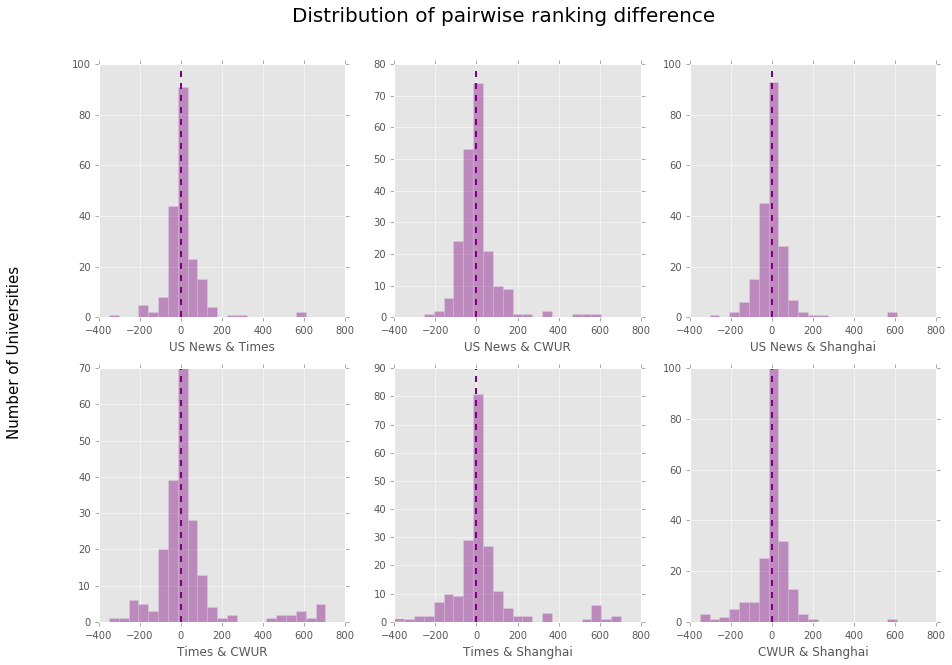

In [8]:
# Checking the distribution of pairwise rankings over 2 years to see if there is any significant change

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 10))
fig.text(0.04, 0.5, 'Number of Universities', va='center', rotation='vertical', fontsize =15)

plt.subplot(2,3,1)
plt.hist(rank_analysis_sct.u_t, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('US News & Times')

plt.subplot(2,3,2)
plt.hist(rank_analysis_sct.u_c, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('US News & CWUR')

plt.subplot(2,3,3)
plt.hist(rank_analysis_sct.u_s, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('US News & Shanghai')

plt.subplot(2,3,4)
plt.hist(rank_analysis_sct.t_c, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Times & CWUR')

plt.subplot(2,3,5)
plt.hist(rank_analysis_sct.t_s, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Times & Shanghai')

plt.subplot(2,3,6)
plt.hist(rank_analysis_sct.c_s, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('CWUR & Shanghai')

plt.suptitle("Distribution of pairwise ranking difference", fontsize=20)

plt.savefig('plot_all_hist.jpg')
plt.show()

In [9]:
# Function to create logical clusters
def logical_cluster(pair_col, logical_cluster_col):
    rank_analysis_sct[logical_cluster_col] = 0
    for i in range(len(rank_analysis_sct)):
        if rank_analysis_sct.loc[i,pair_col] < -216: rank_analysis_sct.loc[i,logical_cluster_col] = 0
        elif rank_analysis_sct.loc[i,pair_col] < -50 and rank_analysis_sct.loc[i,pair_col] >= -216:
            rank_analysis_sct.loc[i,logical_cluster_col] = 1
        elif rank_analysis_sct.loc[i,pair_col] > -50 and rank_analysis_sct.loc[i,pair_col] < 50:
            rank_analysis_sct.loc[i,logical_cluster_col] = 2
        elif rank_analysis_sct.loc[i,pair_col] > 50 and rank_analysis_sct.loc[i,pair_col] <= 216:
            rank_analysis_sct.loc[i,logical_cluster_col] = 3
        elif rank_analysis_sct.loc[i,pair_col] > 216: rank_analysis_sct.loc[i,logical_cluster_col] = 4

In [10]:
# Creating logical clusters based on intervals obtained after eyeballing the data
logical_cluster('u_t', 'u_t_cluster_logical')
logical_cluster('u_c', 'u_c_cluster_logical')
logical_cluster('u_s', 'u_s_cluster_logical')
logical_cluster('t_c', 't_c_cluster_logical')
logical_cluster('t_s', 't_s_cluster_logical')
logical_cluster('c_s', 'c_s_cluster_logical')

# rank_analysis_sct.groupby('u_t_cluster_logical').count()['university_name']

#### Here we have created a logical cluster for the pair Times and CWUR after eyeballing our data. This will give us a good measure of testing our clustering algorithm.

#### Now let us cluster using K Mean algorithm

In [11]:
# Function to create K-means cluster

def kmeans_cluster(pair_col, knn_cluster_col, order):
    model = KMeans(n_clusters=5)
    k_mean = rank_analysis_sct[[pair_col]]
    model.fit(k_mean)
    pred = np.choose(model.labels_, order).astype(np.int64)  # Assigning correct labels
    rank_analysis_sct[knn_cluster_col] = pred  # Adding column of cluster information to dataset

In [12]:
# Creating kmeans clusters
np.random.seed(seed=1)

kmeans_cluster('u_t', 'u_t_cluster_kmeans', [2, 0, 4, 3, 1])
kmeans_cluster('u_c', 'u_c_cluster_kmeans', [2, 4, 1, 3, 0])
kmeans_cluster('u_s', 'u_s_cluster_kmeans', [2, 0, 4, 3, 1])
kmeans_cluster('t_c', 't_c_cluster_kmeans', [1, 4, 0, 2, 3])
kmeans_cluster('t_s', 't_s_cluster_kmeans', [2, 4, 0, 1, 3])
kmeans_cluster('c_s', 'c_s_cluster_kmeans', [0, 2, 1, 4, 3])

#rank_analysis_sct.groupby('c_s_cluster_kmeans').count()['university_name']

In [13]:
# Function to create scatter plot
def bias_scatter(colormap, rank_diff, cluster, r1, r2, typ):  
    plt.scatter(rank_diff, rank_diff, c=colormap[cluster], s=40, alpha=0.6)
    plt.title('University Bias - '+ r1 + ' vs ' + r2 + ' (' + typ + ')', fontsize = 15)
    plt.xlabel('Difference')
    plt.ylabel('Difference')
    b1 = mpatches.Patch(color=colormap[0], label='Highly Favored by' + r1, alpha = 0.7)
    b2 = mpatches.Patch(color=colormap[1], label='Favored by' + r1, alpha = 0.7)
    b3 = mpatches.Patch(color=colormap[2], label='Neutral', alpha = 0.7)
    b4 = mpatches.Patch(color=colormap[3], label='Favored by' + r2, alpha = 0.7)
    b5 = mpatches.Patch(color=colormap[4], label='Highly Favored by Times' +r2, alpha = 0.7)
    plt.legend(handles=[b1, b2, b3, b4, b5], loc = 2)

    #plt.savefig('LogicalVsKMean.jpg')
    #plt.show()

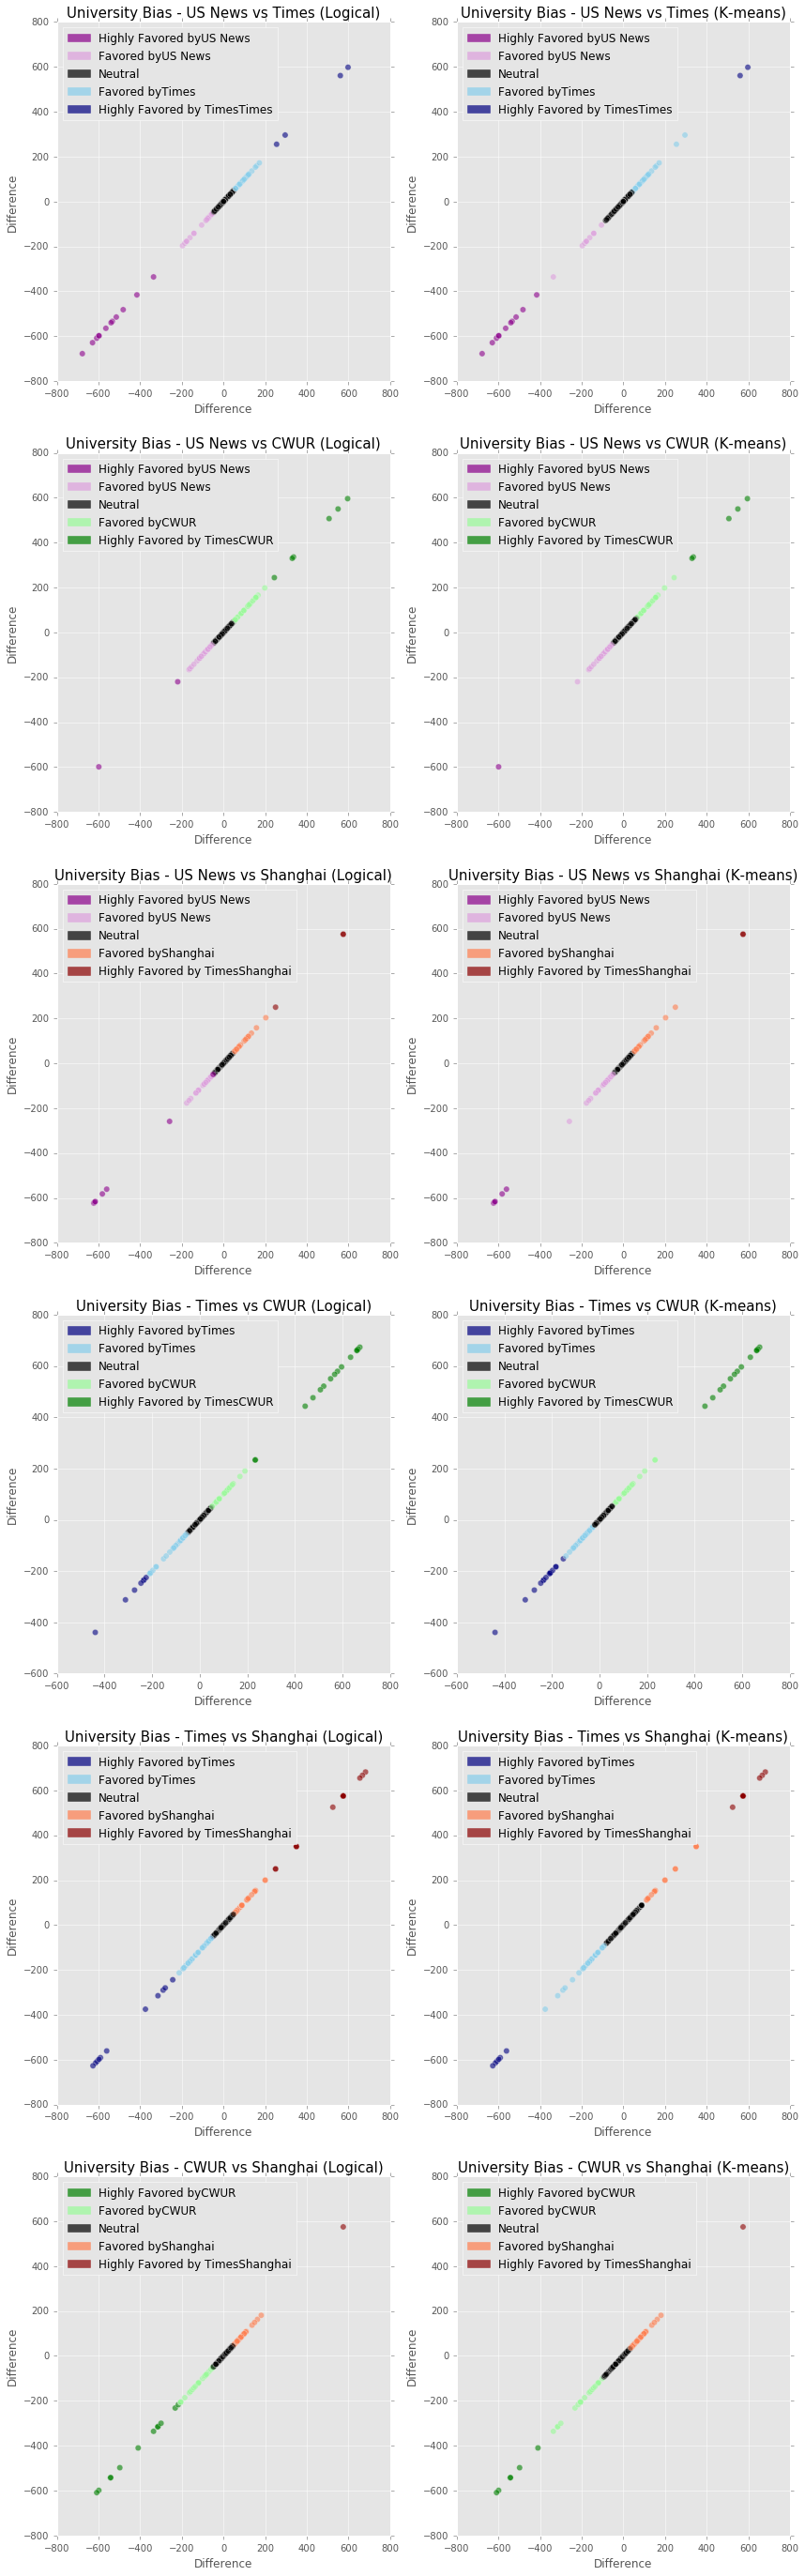

In [14]:
# Plotting scatterplot
colormap_ut = np.array(['darkmagenta', 'plum', 'black','skyblue', 'navy'])
colormap_uc = np.array(['darkmagenta', 'plum', 'black','palegreen', 'green'])
colormap_us = np.array(['darkmagenta', 'plum', 'black','coral', 'darkred'])
colormap_tc = np.array(['navy', 'skyblue', 'black','palegreen', 'green'])
colormap_ts = np.array(['navy', 'skyblue', 'black','coral', 'darkred'])
colormap_cs = np.array(['green', 'palegreen', 'black','coral', 'darkred'])

plt.figure(figsize=(14,48))
plt.subplot(6, 2, 1)
bias_scatter(colormap_ut, rank_analysis_sct.u_t, rank_analysis_sct['u_t_cluster_logical'], 'US News', 'Times', 'Logical')
plt.subplot(6, 2, 2)
bias_scatter(colormap_ut, rank_analysis_sct.u_t, rank_analysis_sct['u_t_cluster_kmeans'], 'US News', 'Times', 'K-means')
plt.subplot(6, 2, 3)
bias_scatter(colormap_uc, rank_analysis_sct.u_c, rank_analysis_sct['u_c_cluster_logical'], 'US News', 'CWUR', 'Logical')
plt.subplot(6, 2, 4)
bias_scatter(colormap_uc, rank_analysis_sct.u_c, rank_analysis_sct['u_c_cluster_kmeans'], 'US News', 'CWUR', 'K-means')
plt.subplot(6, 2, 5)
bias_scatter(colormap_us, rank_analysis_sct.u_s, rank_analysis_sct['u_s_cluster_logical'], 'US News', 'Shanghai', 'Logical')
plt.subplot(6, 2, 6)
bias_scatter(colormap_us, rank_analysis_sct.u_s, rank_analysis_sct['u_s_cluster_kmeans'], 'US News', 'Shanghai', 'K-means')
plt.subplot(6, 2, 7)
bias_scatter(colormap_tc, rank_analysis_sct.t_c, rank_analysis_sct['t_c_cluster_logical'], 'Times', 'CWUR', 'Logical')
plt.subplot(6, 2, 8)
bias_scatter(colormap_tc, rank_analysis_sct.t_c, rank_analysis_sct['t_c_cluster_kmeans'], 'Times', 'CWUR', 'K-means')
plt.subplot(6, 2, 9)
bias_scatter(colormap_ts, rank_analysis_sct.t_s, rank_analysis_sct['t_s_cluster_logical'], 'Times', 'Shanghai', 'Logical')
plt.subplot(6, 2, 10)
bias_scatter(colormap_ts, rank_analysis_sct.t_s, rank_analysis_sct['t_s_cluster_kmeans'], 'Times', 'Shanghai', 'K-means')
plt.subplot(6, 2, 11)
bias_scatter(colormap_cs, rank_analysis_sct.c_s, rank_analysis_sct['c_s_cluster_logical'], 'CWUR', 'Shanghai', 'Logical')
plt.subplot(6, 2, 12)
bias_scatter(colormap_cs, rank_analysis_sct.c_s, rank_analysis_sct['c_s_cluster_kmeans'], 'CWUR', 'Shanghai', 'K-means')
plt.savefig('plot_clusters_scatter.jpg')

In [15]:
# Function to create barplot
def bias_bar(logical_col, knn_col, cm, r1, r2):
    logical_bias = rank_analysis_sct.groupby(logical_col).count()['university_name']
    kmeans_bias = rank_analysis_sct.groupby(knn_col).count()['university_name']
    
    x = logical_bias.index
    y1 = logical_bias.values
    y2 = kmeans_bias
    bar_width = 0.35
    opacity = 0.7
    
    rects1 = plt.bar([x[0], x[0]+0.4], [y1[0], y2[0]], bar_width,  alpha=opacity, color=cm[0], label='High Favor: ' + r1)
    rects2 = plt.bar([x[1], x[1]+0.4], [y1[1], y2[1]], bar_width, alpha=opacity, color=cm[1], label='Favor: ' + r1)
    rects3 = plt.bar([x[2], x[2]+0.4], [y1[2], y2[2]], bar_width, alpha=opacity, color=cm[2], label='Neutral')
    rects4 = plt.bar([x[3], x[3]+0.4], [y1[3], y2[3]], bar_width, alpha=opacity, color=cm[3], label='Favor: ' + r2)
    rects5 = plt.bar([x[4], x[4]+0.4], [y1[4], y2[4]], bar_width, alpha=opacity, color=cm[4], label='High favor: ' + r2)

    plt.text(x[0] + bar_width/2, y1[0], y1[0], ha='center', va='bottom', size=10)
    plt.text(x[1] + bar_width/2, y1[1], y1[1], ha='center', va='bottom', size=10)
    plt.text(x[2] + bar_width/2, y1[2], y1[2], ha='center', va='bottom', size=10)
    plt.text(x[3] + bar_width/2, y1[3], y1[3], ha='center', va='bottom', size=10)
    plt.text(x[4] + bar_width/2, y1[4], y1[4], ha='center', va='bottom', size=10)
    
    plt.text(x[0] + bar_width+0.2, y2[0], y2[0], ha='center', va='bottom', size=10)
    plt.text(x[1] + bar_width+0.2, y2[1], y2[1], ha='center', va='bottom', size=10)
    plt.text(x[2] + bar_width+0.2, y2[2], y2[2], ha='center', va='bottom', size=10)
    plt.text(x[3] + bar_width+0.2, y2[3], y2[3], ha='center', va='bottom', size=10)
    plt.text(x[4] + bar_width+0.2, y2[4], y2[4], ha='center', va='bottom', size=10)

    plt.xlabel('Bias')
    plt.ylabel('Univesities')
    #plt.title('Bias in University Pairs')
    plt.xticks(x + bar_width, ('Logical / KNN', 'Logical / KNN', 'Logical / KNN', 'Logical / KNN', 'Logical / KNN'))

    plt.legend()
    plt.tight_layout()

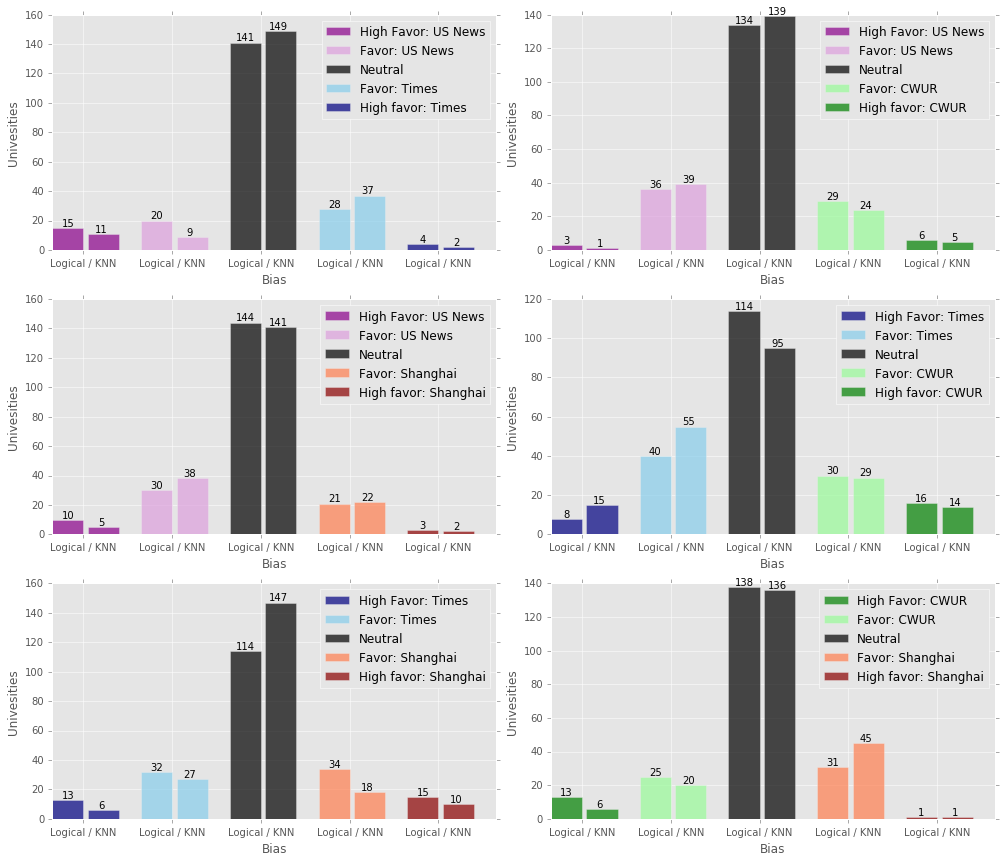

In [16]:
# Plotting barplot
plt.figure(figsize=(14,12))
plt.subplot(3, 2, 1)
bias_bar('u_t_cluster_logical', 'u_t_cluster_kmeans', colormap_ut, 'US News', 'Times')
plt.subplot(3, 2, 2)
bias_bar('u_c_cluster_logical', 'u_c_cluster_kmeans', colormap_uc, 'US News', 'CWUR')
plt.subplot(3, 2, 3)
bias_bar('u_s_cluster_logical', 'u_s_cluster_kmeans', colormap_us, 'US News', 'Shanghai')
plt.subplot(3, 2, 4)
bias_bar('t_c_cluster_logical', 't_c_cluster_kmeans', colormap_tc, 'Times', 'CWUR')
plt.subplot(3, 2, 5)
bias_bar('t_s_cluster_logical', 't_s_cluster_kmeans', colormap_ts, 'Times', 'Shanghai')
plt.subplot(3, 2, 6)
bias_bar('c_s_cluster_logical', 'c_s_cluster_kmeans', colormap_cs, 'CWUR', 'Shanghai')
plt.savefig('plot_clusters_bar.jpg')

In [17]:
# Comparing K-mean classification to logical classification
y = rank_analysis_sct.u_t_cluster_logical

# Performance Metrics
print('Accuracy',sm.accuracy_score(y, rank_analysis_sct['u_t_cluster_kmeans']))

# Confusion Matrix
sm.confusion_matrix(y, rank_analysis_sct['u_t_cluster_kmeans'])

Accuracy 0.884615384615


array([[ 11,   1,   2,   1,   0],
       [  0,   8,  12,   0,   0],
       [  0,   0, 135,   6,   0],
       [  0,   0,   0,  28,   0],
       [  0,   0,   0,   2,   2]])

#### 88% Accuracy rate is pretty good (especially considering we just eyeballed the data to determine initial clusters) so will use the K Mean model to cluster other 2 ranking systems as well.

#### These plots help us visualize the count of Universities for which there is underlying bias between any 2 ranking systems as well as understand in which form the bias exists.

#### Now let us aggregate the result for each University.

In [18]:
# Creating binary columns to determine if 2 systems agree on the ranking of University (based on cluster)

for i in range(len(rank_analysis_sct)):
    if rank_analysis_sct.loc[i,'u_t_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'u_t_proximity'] = 1
    else: rank_analysis_sct.loc[i,'u_t_proximity'] = 0
    if rank_analysis_sct.loc[i,'u_c_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'u_c_proximity'] = 1
    else: rank_analysis_sct.loc[i,'u_c_proximity'] = 0
    if rank_analysis_sct.loc[i,'u_s_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'u_s_proximity'] = 1
    else: rank_analysis_sct.loc[i,'u_s_proximity'] = 0
    if rank_analysis_sct.loc[i,'t_c_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'t_c_proximity'] = 1
    else: rank_analysis_sct.loc[i,'t_c_proximity'] = 0
    if rank_analysis_sct.loc[i,'t_s_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'t_s_proximity'] = 1
    else: rank_analysis_sct.loc[i,'t_s_proximity'] = 0
    if rank_analysis_sct.loc[i,'c_s_cluster_kmeans'] in [1,2,3]: rank_analysis_sct.loc[i,'c_s_proximity'] = 1
    else: rank_analysis_sct.loc[i,'c_s_proximity'] = 0

# Creating column for aggregate trustworthiness of all 3 ranking systems for each University
# Score of 3 means all 3 ranking sytem pairs agree on ranking of a University and
# Score of 0 means that no pair of ranking system agrees on ranking of a University
rank_analysis_sct['impartiality_score'] = rank_analysis_sct['u_t_proximity'] + rank_analysis_sct['u_c_proximity'
                                      ] + rank_analysis_sct['u_s_proximity'] + rank_analysis_sct['t_c_proximity'
                                      ] + rank_analysis_sct['t_s_proximity'] + rank_analysis_sct['c_s_proximity']

                                                                                                 
rank_analysis_sct.to_csv('resultsRankingAnalysis.csv')

# Summarizing results
assurance_summary = rank_analysis_sct[['university_name', 'impartiality_score']].groupby('impartiality_score').count()
assurance_summary.rename(columns={'university_name': 'Total Universities'}, inplace=True)
assurance_summary.sort_index(ascending = False)

,Total Universities
impartiality_score,
6,173
5,13
4,5
3,13
2,4


#### We can interpret the above results as:
#### 110 Universities have similar rankings across all ranking systems which means that all ranking systems are impartial towards them whereas 2 Universities have very different rankings across all ranking systems which means one of the the ranking systems is heavily biased towards them.

### Part 4 - Checking for bias in ranking system owing to countries

#### First let us see how the distribution of countries in the ranking systems looks like

In [19]:
country_bias = pd.DataFrame(rank_analysis_sct.groupby('country').count().sort_values(by='university_name',
                                                                      ascending = False)['university_name'])

country_bias = pd.DataFrame(list(country_bias['university_name'].values), list(country_bias['university_name'].index))
country_bias.rename(columns={0: 'Total Universities'}, inplace=True)
country_bias.head(2)

,Total Universities
USA,75
UK,27


#### Here we see the distribution of countries harboring top 100 universities in each ranking system.

#### Now let us check if any ranking system exhibits bias based on country. For the purpose of this analysis, we will assume there is a bias if the difference in ranking is greater than 50 (this is a charitable range given that we are considering the top 100 Universities). Also, we will be considering all countries in this analysis, but the countries which have less than 2 universities in the ranking won't be very significant (and hence won't be displayed) in the final analysis just on account of small sample size.

#### We will be considering both - the bias against Universities from a country as well as the bias towards the universities from a country.

In [20]:
# Creating function to compute bias based on the kmeans cluster affiliation of a university
def country_bias_calc(p_kmeans, p, bias_name, country_bias_tab):
    pkm0, pkm1, pkm2 = p_kmeans[0]+'_cluster_kmeans', p_kmeans[1]+'_cluster_kmeans', p_kmeans[2]+'_cluster_kmeans'
    
    bias_pair = pd.DataFrame(rank_analysis_sct[rank_analysis_sct[pkm0].isin(p[0]) & 
                                               rank_analysis_sct[pkm1].isin(p[1]) &
                                               rank_analysis_sct[pkm2].isin(p[2])
                                              ].groupby('country').count()['university_name'])
    bias_pair = pd.DataFrame(list(bias_pair['university_name'].values), list(bias_pair['university_name'].index))
    bias_pair.rename(columns={0: bias_name}, inplace=True)
    
    if country_bias_tab.empty: tab = country_bias
    else: tab = country_bias_tab
    country_bias_tab = pd.merge(tab, bias_pair, on=None,left_index=True, right_index=True, how = 'left')
    country_bias_tab[bias_name] = country_bias_tab[bias_name].replace(np.nan, 0)
    country_bias_tab[bias_name + ' %'] = country_bias_tab[bias_name] / country_bias_tab['Total Universities'] * 100
    return country_bias_tab

In [21]:
# Computing country bias
country_bias_f = pd.DataFrame
country_bias_a = pd.DataFrame

country_bias_f = country_bias_calc(['u_t', 'u_c', 'u_s'],[[0,1],[0,1],[0,1]] ,'US News Bias', country_bias_f)
country_bias_f = country_bias_calc(['u_t', 't_c', 't_s'],[[3,4],[0,1],[0,1]], 'Times Bias', country_bias_f)
country_bias_f = country_bias_calc(['u_c', 't_c', 'c_s'],[[3,4],[3,4],[0,1]], 'CWUR Bias', country_bias_f)
country_bias_f = country_bias_calc(['u_s', 't_s', 'c_s'],[[3,4],[3,4],[3,4]], 'Shanghai Bias', country_bias_f)

country_bias_a = country_bias_calc(['u_t', 'u_c', 'u_s'],[[3,4],[3,4],[3,4]] ,'US News Bias', country_bias_a)
country_bias_a = country_bias_calc(['u_t', 't_c', 't_s'],[[0,1],[3,4],[3,4]], 'Times Bias', country_bias_a)
country_bias_a = country_bias_calc(['u_c', 't_c', 'c_s'],[[0,1],[0,1],[3,4]], 'CWUR Bias', country_bias_a)
country_bias_a = country_bias_calc(['u_s', 't_s', 'c_s'],[[0,1],[0,1],[0,1]], 'Shanghai Bias', country_bias_a)

# Uncomment below code to check for extreme bias

#country_bias_f = country_bias_calc(['u_t', 'u_c', 'u_s'],[[0,0],[0,0],[0,0]] ,'US News Bias', country_bias_f)
#country_bias_f = country_bias_calc(['u_t', 't_c', 't_s'],[[4,4],[0,0],[0,0]], 'Times Bias', country_bias_f)
#country_bias_f = country_bias_calc(['u_c', 't_c', 'c_s'],[[4,4],[4,4],[0,0]], 'CWUR Bias', country_bias_f)
#country_bias_f = country_bias_calc(['u_s', 't_s', 'c_s'],[[4,4],[4,4],[4,4]], 'Shanghai Bias', country_bias_f)

#country_bias_a = country_bias_calc(['u_t', 'u_c', 'u_s'],[[4,4],[4,4],[4,4]] ,'US News Bias', country_bias_a)
#country_bias_a = country_bias_calc(['u_t', 't_c', 't_s'],[[0,0],[4,4],[4,4]], 'Times Bias', country_bias_a)
#country_bias_a = country_bias_calc(['u_c', 't_c', 'c_s'],[[0,0],[0,0],[4,4]], 'CWUR Bias', country_bias_a)
#country_bias_a = country_bias_calc(['u_s', 't_s', 'c_s'],[[0,0],[0,0],[0,0]], 'Shanghai Bias', country_bias_a)

In [22]:
#rank_analysis_sct[rank_analysis_sct['u_t_cluster_kmeans'].isin([0,1]) &
#                 rank_analysis_sct['t_c_cluster_kmeans'].isin([3,4]) &
#                 rank_analysis_sct['t_s_cluster_kmeans'].isin([3,4])]
country_bias_a.head(2)

,Total Universities,US News Bias,US News Bias %,Times Bias,Times Bias %,CWUR Bias,CWUR Bias %,Shanghai Bias,Shanghai Bias %
USA,75,0,0.000000,5,6.666667,3,4.000000,5,6.666667
UK,27,1,3.703704,1,3.703704,6,22.222222,0,0.000000


In [23]:
# Breaking the main tables into tables based on rankings to plot

t = 5  # Minimumum bias % for us to consider bias
u = 0  # Minimum universities in the ranking system to consider bias

bias_for_usnews = country_bias_f[(country_bias_f['US News Bias %'] >= t) & (country_bias_f['Total Universities'] > u)
        ].sort_values(by='US News Bias %', ascending = False)[['Total Universities', 'US News Bias', 'US News Bias %']]

bias_against_usnews = country_bias_a[(country_bias_a['US News Bias %'] >= t) & (country_bias_a['Total Universities'] > u)
        ].sort_values(by='US News Bias %', ascending = False)[['Total Universities', 'US News Bias', 'US News Bias %']]

bias_for_times = country_bias_f[(country_bias_f['Times Bias %'] >= t) & (country_bias_f['Total Universities'] > u)
        ].sort_values(by='Times Bias %', ascending = False)[['Total Universities', 'Times Bias', 'Times Bias %']]

bias_against_times = country_bias_a[(country_bias_a['Times Bias %'] >= t) & (country_bias_a['Total Universities'] > u)
        ].sort_values(by='Times Bias %', ascending = False)[['Total Universities', 'Times Bias', 'Times Bias %']]

bias_for_cwur = country_bias_f[(country_bias_f['CWUR Bias %'] >= t) & (country_bias_f['Total Universities'] > u)
        ].sort_values(by='CWUR Bias %', ascending = False)[['Total Universities', 'CWUR Bias', 'CWUR Bias %']]

bias_against_cwur = country_bias_a[(country_bias_a['CWUR Bias %'] >= t) & (country_bias_a['Total Universities'] > u)
        ].sort_values(by='CWUR Bias %', ascending = False)[['Total Universities', 'CWUR Bias', 'CWUR Bias %']]

bias_for_shanghai = country_bias_f[(country_bias_f['Shanghai Bias %'] >= t) & (country_bias_f['Total Universities'] > u)
        ].sort_values(by='Shanghai Bias %', ascending = False)[['Total Universities', 'Shanghai Bias', 'Shanghai Bias %']]

bias_against_shanghai = country_bias_a[(country_bias_a['Shanghai Bias %'] >= t) & (country_bias_a['Total Universities'] > u)
        ].sort_values(by='Shanghai Bias %', ascending = False)[['Total Universities', 'Shanghai Bias', 'Shanghai Bias %']]

#### Creating a generic function to plot graphs which represent bias for and bias against universities from certain countries...

In [24]:
# Function to create country bias bar plot
def bias_plot(b_for, b_against, b_name):
    
    def autolabel(rects, ht, m):
        cnt = 0
        for rect in rects:
            height = rect.get_height()
            if cnt < len(rects) and rect == rects1[cnt]:
                ht.append(height)
                cnt+=1
                #m.text(rect.get_x() + rect.get_width()/2., 
                #        height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
            else:
                #m.text(rect.get_x() + rect.get_width()/2., 
                #         height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
                
                if m==ax2 and cnt==0 and height/ht[cnt] > 0.85:
                    m.text(rect.get_x() + rect.get_width()/2., 
                        height-2, '%d' % (height/ht[cnt]*100)+'%', ha='center', va='bottom', fontsize=18)
                else:
                    m.text(rect.get_x() + rect.get_width()/2., 
                        height, '%d' % (height/ht[cnt]*100)+'%', ha='center', va='bottom', fontsize=18)
                cnt+=1
        return ht
    
    N = len(b_for)
    univ_total = np.array(b_for['Total Universities'])
    univ_bias_for = np.array(b_for[b_name + ' Bias'])
    ind = np.arange(N)
    width = 0.35
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (15,8))
    rects1 = ax1.bar(ind, univ_total, width, color='sage')
    rects2 = ax1.bar(ind + width, univ_bias_for, width, color='lightsage')
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_xticks(ind + width)
    ax1.set_xticklabels(b_for.index, fontsize=14)
    ax1.legend((rects1[0], rects2[0]), ('Total Universities', 
                                       'Universities biased for by ' + b_name), loc='upper left')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.xaxis.set_ticks_position('none')

    ht = []
    ht = autolabel(rects1, ht, ax1)
    autolabel(rects2, ht, ax1)
    
    N = len(b_against)
    univ_total = np.array(b_against['Total Universities'])
    univ_bias_against = np.array(b_against[b_name + ' Bias'])
    ind = np.arange(N)
    
    rects1 = ax2.bar(ind, univ_total, width, color='firebrick')
    rects2 = ax2.bar(ind + width, univ_bias_against, width, color='salmon')
    ax2.set_ylabel('Count', fontsize=14)
    ax2.set_xticks(ind + width)
    ax2.set_xticklabels(b_against.index, fontsize=14)
    ax2.legend((rects1[0], rects2[0]), ('Total Universities',
                                       'Universities biased against by ' + b_name), loc='upper left')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.yaxis.set_ticks_position('none')
    ax2.xaxis.set_ticks_position('none')

    ht = []
    ht = autolabel(rects1, ht, ax2)
    autolabel(rects2, ht, ax2)
    
    plt.suptitle('Country-wise bias towards(blue) and against(red) universities - ' + b_name, fontsize=20)
    plt.savefig('plot_'+b_name+'_bias.jpg')
    plt.show()

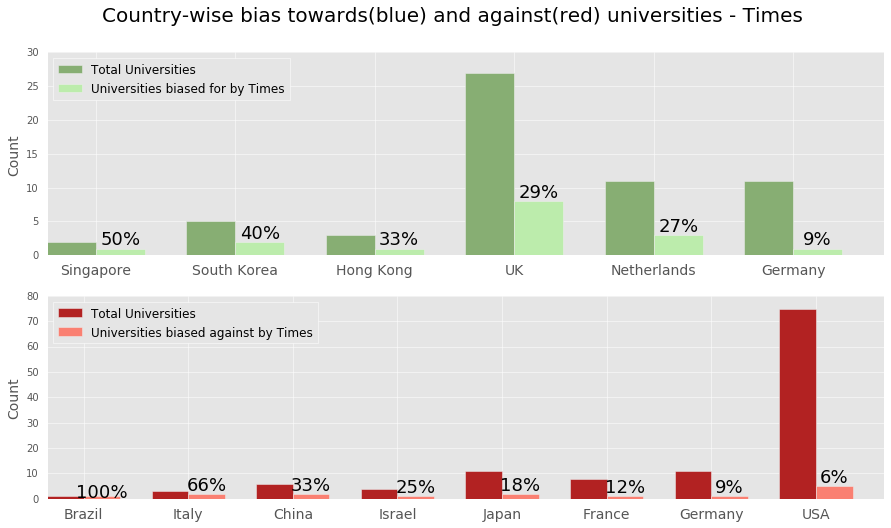

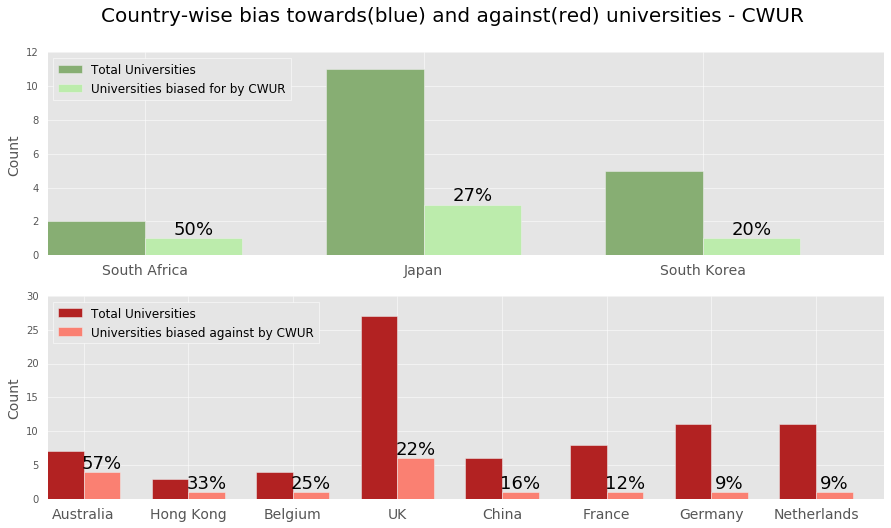

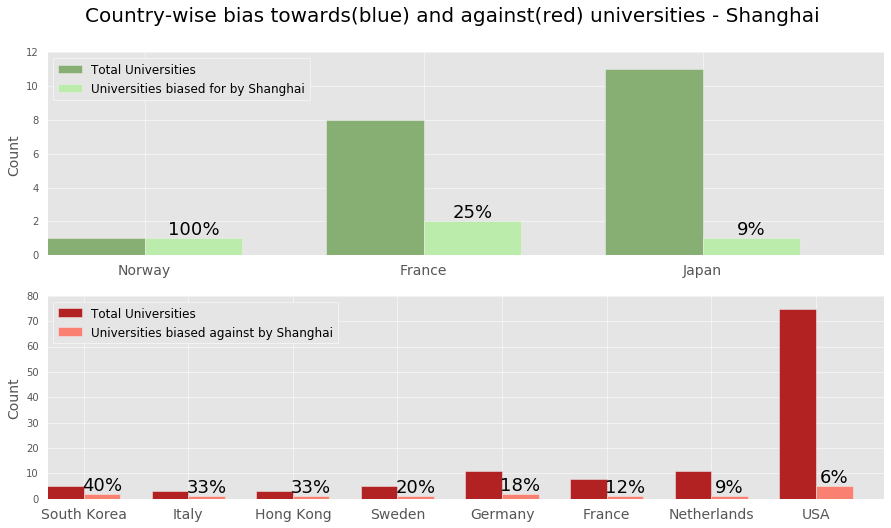

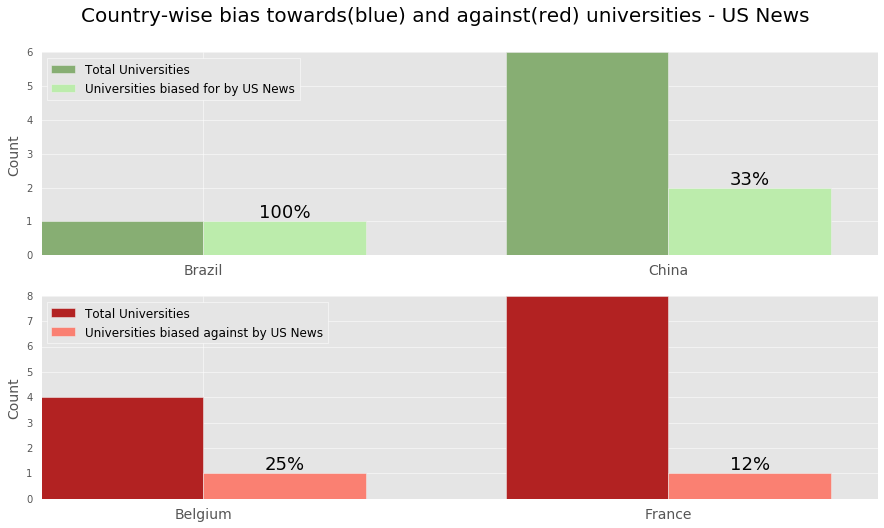

In [25]:
# Computing bias for US News
bias_plot(bias_for_times, bias_against_times, 'Times')
bias_plot(bias_for_cwur, bias_against_cwur, 'CWUR')
bias_plot(bias_for_shanghai, bias_against_shanghai, 'Shanghai')
bias_plot(bias_for_usnews, bias_against_usnews, 'US News')

#### In conclusion, w.r.t. bias towards universities, we can say that - 
#### Times (a ranking system from the UK) exhibits a very high bias for universities from Western Europe (Netherlands, Switzerland) and universities from East Asia (South Korea, Hong Kong).. CWUR (a ranking system from Saudi Arabia) exhibits a very high bias for Universities from the Far East (Japan). Shanghai (a ranking system from China) exhibits a very high bias for Universities from Western Europe (France, Switzerland) and universities from the Middle East (Israel). US News (a ranking system from USA) exhibits a very high bias for Universities from South America (Brazl)


#### In conclusion, w.r.t. bias against universities, we can say that -
#### Times (a ranking system from the UK) exhibits a very high bias against universities from the Middle East (Israel) and universities from the Far East (Japan). CWUR (a ranking system from Saudi Arabia) exhibits a very high bias against Universities from the Western Europe (Netherlands, Sweden, Belgium), South America (Brazil) and Australia.Shanghai (a ranking system from China) exhibits a very high bias against Universities from Western Europe (Netherlands, Germany, Switzerland, Italy),  East Asia (Hong Kong) and Australia. US News (a ranking system from USA) exhibits a very high bias for Universities from Western Europe (France)

### Part 5 - Preparing data for visualization and US only analysis

In [26]:
# Preparing data for Force Directed visualization
force_analysis = rank_analysis_sct[['university_name','u_t_cluster_kmeans', 'u_c_cluster_kmeans', 
                                                      'u_s_cluster_kmeans', 't_c_cluster_kmeans', 
                                                      't_s_cluster_kmeans', 'c_s_cluster_kmeans']]

force_analysis = force_analysis[force_analysis['u_t_cluster_kmeans'].isin([0,4]) | 
                                force_analysis['u_c_cluster_kmeans'].isin([0,4]) |
                                force_analysis['u_s_cluster_kmeans'].isin([0,4]) |
                                force_analysis['t_c_cluster_kmeans'].isin([0,4]) |
                                force_analysis['t_s_cluster_kmeans'].isin([0,4]) |
                                force_analysis['c_s_cluster_kmeans'].isin([0,4])][[
                                               'university_name', 'u_t_cluster_kmeans', 'u_c_cluster_kmeans', 
                                                                  'u_s_cluster_kmeans', 't_c_cluster_kmeans', 
                                                                  't_s_cluster_kmeans', 'c_s_cluster_kmeans']]

force_analysis.rename(columns={'u_t_cluster_kmeans': 'u_t', 'u_c_cluster_kmeans': 'u_c', 'u_s_cluster_kmeans': 'u_s',
                        't_c_cluster_kmeans': 't_c', 't_s_cluster_kmeans': 't_s', 'c_s_cluster_kmeans': 'c_s'}, inplace=True)
force_analysis = force_analysis.reset_index(drop=True)
force_analysis = force_analysis.replace([1,2,3], '-')
force_analysis.head(2)

,university_name,u_t,u_c,u_s,t_c,t_s,c_s
0,"University of California, San Francisco",0,-,-,4,4,-
1,Rockefeller University,0,-,-,4,4,-


In [27]:
# Loading and cleaning US university meta data
univ_df = pd.read_csv('dataAllInstitutions.csv', encoding = "ISO-8859-1")
univ_df = univ_df.replace("Columbia University in the City of New York", "Columbia University")
univ_df = univ_df.replace("University of Washington-Seattle Campus", "University of Washington")
univ_df = univ_df.replace("The University of Texas at Austin", "University of Texas at Austin")
univ_df = univ_df.replace("Washington University in St Louis", "Washington University in St. Louis")
univ_df = univ_df.replace("University of Pittsburgh-Pittsburgh Campus", "University of Pittsburgh")
univ_df = univ_df.replace("Texas A & M University-College Station", "Texas A&M University")
univ_df = univ_df.replace("Arizona State University-Tempe", "Arizona State University")
univ_df = univ_df.replace("Indiana University-Bloomington", "Indiana University Bloomington")
univ_df = univ_df.replace("The University of Texas MD Anderson Cancer Center", "University of Texas MD Anderson Cancer Center")
univ_df = univ_df.replace("University of Colorado Denver", "University of Colorado at Denver")
univ_df = univ_df.replace("The University of Texas at Dallas", "University of Texas at Dallas")
univ_df = univ_df.replace("University of Massachusetts Medical School Worcester", "University of Massachusetts Medical School")
univ_df = univ_df.replace("University of Illinois at Chicago", "University of Illinois Chicago")
univ_df = univ_df.replace("The University of Tennessee-Knoxville", "University of Tennessee, Knoxville")
univ_df = univ_df.replace("University of Alabama at Birmingham", "University of Alabama, Birmingham")
univ_df = univ_df.replace("The University of Texas Health Science Center at Houston", 
                          "University of Texas Health Science Center, Houston")
univ_df = univ_df.replace("North Carolina State University at Raleigh", "North Carolina State University")
univ_df = univ_df.replace("Colorado State University-Fort Collins", "Colorado State University")
univ_df = univ_df.replace("Virginia Tech Carilion School of Medicine", "Virginia Tech")
univ_df = univ_df.replace("University of South Carolina-Columbia", "University of South Carolina")
univ_df = univ_df.replace("University of Oklahoma-Norman Campus", "University of Oklahoma")
univ_df = univ_df.replace("Oregon Health & Science University", "Oregon Health and Science University")
univ_df = univ_df.replace("CUNY Graduate School and University Center", "City University of New York (CUNY) System")
univ_df = univ_df.replace("University of Hawaii at Manoa", "University of Hawaii, Manoa")
univ_df = univ_df.replace("Tulane University of Louisiana", "Tulane University")
univ_df = univ_df.replace("SUNY at Albany", "University at Albany, SUNY")
univ_df = univ_df.replace("The University of Alabama", "University of Alabama, Tuscaloosa")
univ_df = univ_df.replace("University at Buffalo, SUNY", "University at Buffalo")
univ_df = univ_df.replace("The University of Texas at Arlington", "University of Texas, Arlington")
univ_df = univ_df.replace("The University of Texas Medical Branch", "University of Texas Medical Branch, Galveston")
univ_df = univ_df.replace("College of William and Mary", "William & Mary")
# univ_df = univ_df.replace("University at Buffalo, SUNY", "Georgia Health Sciences University")
univ_df = univ_df.replace("The University of Montana", "University of Montana")
univ_df = univ_df.replace("Albany State University", "State University of New York Albany")
univ_df = univ_df.replace("University of Nebraska-Lincoln", "University of Nebraska, Lincoln")
univ_df = univ_df.replace(re.compile('-Main Campus'), '')
univ_df = univ_df.replace(re.compile('-'), ', ')
univ_df = univ_df.replace("University of Wisconsin, Madison", "University of Wisconsin-Madison")
univ_df = univ_df.replace("University of Illinois at Urbana, Champaign", "University of Illinois at Urbana-Champaign")
univ_df = univ_df.replace("Oklahoma State University ,  Stillwater", "Oklahoma State University - Stillwater")
univ_df = univ_df.replace("Indiana University, Purdue University, Indianapolis", 
                          "Indiana University-Purdue University, Indianapolis")
univ_df = univ_df.replace("University of Massachusetts Medical School Worcester", "University of Massachusetts, Worcester")
univ_df = univ_df.replace("University of Missouri, Columbia", "University of Missouri, Columbia")
#univ_df.head(2)

In [42]:
rank_analysis_sct.head(1)

,university_name,country,usnews_2014_r,times_2014_r,cwur_2014_r,sh_2014_r,u_t,u_c,u_s,t_c,t_s,c_s,u_t_cluster_logical,u_c_cluster_logical,u_s_cluster_logical,t_c_cluster_logical,t_s_cluster_logical,c_s_cluster_logical,u_t_cluster_kmeans,u_c_cluster_kmeans,u_s_cluster_kmeans,t_c_cluster_kmeans,t_s_cluster_kmeans,c_s_cluster_kmeans,u_t_proximity,u_c_proximity,u_s_proximity,t_c_proximity,t_s_proximity,c_s_proximity,impartiality_score
0,Harvard University,USA,1,2,1,1,-1,0,0,1,1,0,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,6


In [54]:
# Preparing data for US only analysis
usa_analysis = rank_analysis_sct[rank_analysis_sct['country'] == 'USA']
usa_analysis = usa_analysis.reset_index(drop=True)[['university_name', 'usnews_2014_r', 'u_t_cluster_kmeans', 'u_c_cluster_kmeans',
                                                    'u_s_cluster_kmeans',
                                                    'times_2014_r', 'cwur_2014_r', 'sh_2014_r', 'impartiality_score']]
print('Universities in US analysis - ', usa_analysis.count()['university_name'])

# Merging the university meta data with the ranking data
usa_bias_analysis = pd.merge(usa_analysis, univ_df, on = 'university_name', how = 'left')

usa_bias_analysis = usa_bias_analysis[['university_name', 'usnews_2014_r','times_2014_r', 'cwur_2014_r', 'sh_2014_r',
                                       'u_t_cluster_kmeans','u_c_cluster_kmeans', 'u_s_cluster_kmeans',
                                       'impartiality_score', 'fin_aid_%', 'num_bac_deg', 'num_mas_deg',
                                       'num_doc_deg', 'in_st_on_cmp_pr', 'in_st_of_cmp_pr', 'tot_adm_%', 'men_adm_%',
                                       'wom_adm_%', 'und_enr', 'tot_enr', 'whi_%', 'dis_edu_%', 'fte_staff', 'rsrh_fte',
                                       'avg_sal_all_fte','avg_sal_prof']]

usa_bias_analysis = usa_bias_analysis.fillna(0)

usa_bias_analysis['impartiality_score_num'] = usa_bias_analysis['impartiality_score']
usa_bias_analysis['u_t_cluster_kmeans_bin'] = usa_bias_analysis['u_t_cluster_kmeans']
usa_bias_analysis['u_c_cluster_kmeans_bin'] = usa_bias_analysis['u_c_cluster_kmeans']
usa_bias_analysis['u_s_cluster_kmeans_bin'] = usa_bias_analysis['u_s_cluster_kmeans']
usa_bias_analysis['impartiality_score_num'].replace([2,3,4,5,6],[1,1,1,1,0],inplace=True)
usa_bias_analysis['u_t_cluster_kmeans_bin'].replace([0,1,2,3,4],[1,0,0,0,-1],inplace=True)
usa_bias_analysis['u_c_cluster_kmeans_bin'].replace([0,1,2,3,4],[1,0,0,0,-1],inplace=True)
usa_bias_analysis['u_s_cluster_kmeans_bin'].replace([0,1,2,3,4],[1,0,0,0,-1],inplace=True)
usa_bias_analysis.head(2)

Universities in US analysis -  75


,university_name,usnews_2014_r,times_2014_r,cwur_2014_r,sh_2014_r,u_t_cluster_kmeans,u_c_cluster_kmeans,u_s_cluster_kmeans,impartiality_score,fin_aid_%,num_bac_deg,num_mas_deg,num_doc_deg,in_st_on_cmp_pr,in_st_of_cmp_pr,tot_adm_%,men_adm_%,wom_adm_%,und_enr,tot_enr,whi_%,dis_edu_%,fte_staff,rsrh_fte,avg_sal_all_fte,avg_sal_prof,impartiality_score_num,u_t_cluster_kmeans_bin,u_c_cluster_kmeans_bin,u_s_cluster_kmeans_bin
0,Harvard University,1,2,1,1,2,2,2,6,75,1757,4188,1528,62250,0,6,6,6,10338,28791,46,5,16543,2068,168084,214857,0,0,0,0
1,Massachusetts Institute of Technology,2,5,3,3,2,2,2,6,88,1099,1648,606,61030,0,8,6,13,4512,11319,33,0,11992,4399,146826,195282,0,0,0,0


### Part 6 - Performing US only analysis

In [75]:
# Setting independent variables
cols = usa_bias_analysis[['fin_aid_%', 'num_bac_deg', 'num_mas_deg', 'num_doc_deg',
                        'in_st_on_cmp_pr', 'in_st_of_cmp_pr', 'tot_adm_%', 'men_adm_%', 'wom_adm_%',
                        'und_enr', 'tot_enr', 'whi_%', 'dis_edu_%', 'fte_staff', 'rsrh_fte', 'avg_sal_all_fte',
                        'avg_sal_prof']]

In [74]:
# Attempting to reduce the factors by PCA

from sklearn.decomposition import PCA
pca = PCA().fit(cols)
print('Explained variance by component: %s' % pca.explained_variance_ratio_)
pd.DataFrame(factor.components_,columns=cols.columns)

Explained variance by component: [  7.87300388e-01   9.16849285e-02   8.15771971e-02   2.85095015e-02
   6.87532143e-03   2.93085053e-03   8.13651791e-04   2.19914397e-04
   5.55998148e-05   2.73793820e-05   5.11824813e-06   1.00762532e-07
   3.08750427e-08   1.54442067e-08   1.04815161e-09   8.08600969e-10
   3.63248439e-11]


,fin_aid_%,num_bac_deg,num_mas_deg,num_doc_deg,in_st_on_cmp_pr,in_st_of_cmp_pr,tot_adm_%,men_adm_%,wom_adm_%,und_enr,tot_enr,whi_%,dis_edu_%,fte_staff,rsrh_fte,avg_sal_all_fte,avg_sal_prof
0,6.689904,147.472464,374.001362,45.950141,15155.734351,21904.255068,3.801304,3.881983,3.824882,1531.099213,3545.144284,4.862801,0.733476,981.888387,29.237609,16049.487082,21520.916477
1,3.405602,-948.608802,0.249318,-58.067514,16752.914163,-4454.581566,-6.396954,-6.077470,-6.617479,-3561.009162,-3229.882917,1.746729,-0.083996,900.570466,173.065656,18762.602404,26304.861100
2,-7.985337,-2272.244109,-219.761785,-214.999898,128.433574,116.353700,-16.176210,-15.524321,-16.798987,-11671.397751,-14826.756734,-8.964278,-0.487578,-3671.515505,-189.496914,-19350.715647,-25331.063006
3,-10.008167,-1276.516364,-466.721857,-176.566842,-646.204056,63.923829,-7.892714,-7.685102,-8.049507,-4871.431815,-5835.100644,0.224103,-0.265613,671.561357,143.555256,23882.229628,32776.949974


In [77]:
# Attempting to find latent factors

from sklearn.decomposition import FactorAnalysis
factor = FactorAnalysis(n_components=4, random_state=101).fit(cols)
pd.DataFrame(factor.components_,columns=cols.columns)

,fin_aid_%,num_bac_deg,num_mas_deg,num_doc_deg,in_st_on_cmp_pr,in_st_of_cmp_pr,tot_adm_%,men_adm_%,wom_adm_%,und_enr,tot_enr,whi_%,dis_edu_%,fte_staff,rsrh_fte,avg_sal_all_fte,avg_sal_prof
0,6.689904,147.472464,374.001362,45.950141,15155.734351,21904.255068,3.801304,3.881983,3.824882,1531.099213,3545.144284,4.862801,0.733476,981.888387,29.237609,16049.487082,21520.916477
1,3.405602,-948.608802,0.249318,-58.067514,16752.914163,-4454.581566,-6.396954,-6.077470,-6.617479,-3561.009162,-3229.882917,1.746729,-0.083996,900.570466,173.065656,18762.602404,26304.861100
2,-7.985337,-2272.244109,-219.761785,-214.999898,128.433574,116.353700,-16.176210,-15.524321,-16.798987,-11671.397751,-14826.756734,-8.964278,-0.487578,-3671.515505,-189.496914,-19350.715647,-25331.063006
3,-10.008167,-1276.516364,-466.721857,-176.566842,-646.204056,63.923829,-7.892714,-7.685102,-8.049507,-4871.431815,-5835.100644,0.224103,-0.265613,671.561357,143.555256,23882.229628,32776.949974


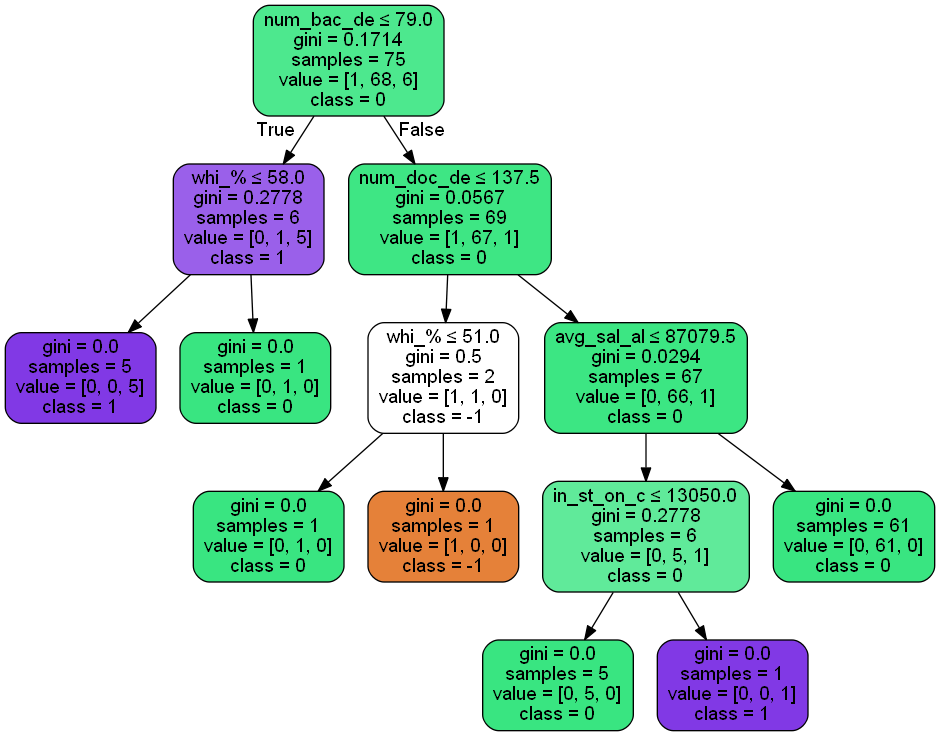

In [57]:
# Creating decision tree predicting the impartiality score using university meta features
from sklearn import tree
import pydotplus 
import os
from IPython.display import Image

# Can use impartiality_score_num

dependent = 'u_t_cluster_kmeans_bin'
imps = list(map(int, usa_bias_analysis.groupby(dependent).count()['university_name'].index))

# Building decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cols, usa_bias_analysis[dependent])

# Plotting decision tree
dot_data = tree.export_graphviz(clf, out_file='bias.dot',
                    feature_names = np.array(cols.columns, dtype='<U10'), 
                    class_names = np.array(imps, dtype='<U10'),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_file('bias.dot') 
graph.write_pdf("plot_analysis_dt1.pdf")
os.unlink('bias.dot')
Image(graph.create_png())

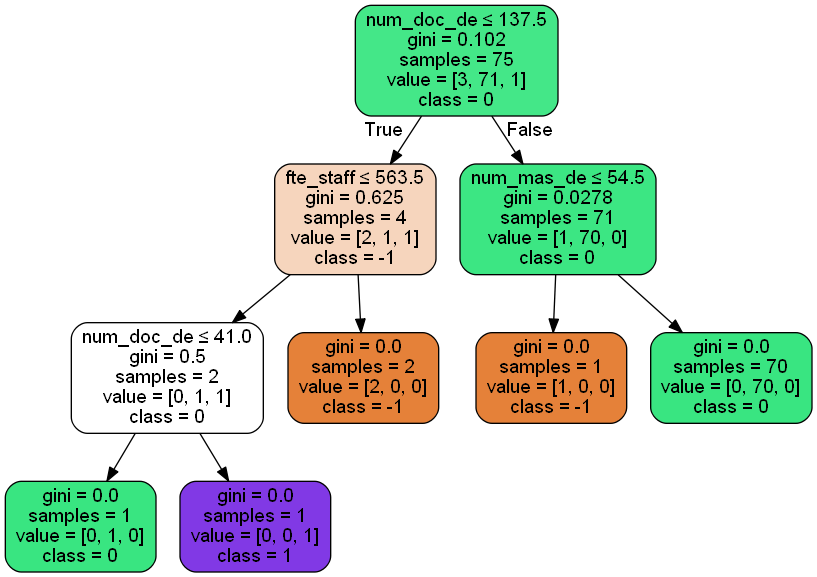

In [58]:
dependent = 'u_c_cluster_kmeans_bin'

imps = list(map(int, usa_bias_analysis.groupby(dependent).count()['university_name'].index))

# Building decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cols, usa_bias_analysis[dependent])

# Plotting decision tree
dot_data = tree.export_graphviz(clf, out_file='bias.dot',
                    feature_names = np.array(cols.columns, dtype='<U10'), 
                    class_names = np.array(imps, dtype='<U10'),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_file('bias.dot') 
graph.write_pdf("plot_analysis_dt2.pdf")
os.unlink('bias.dot')
Image(graph.create_png())

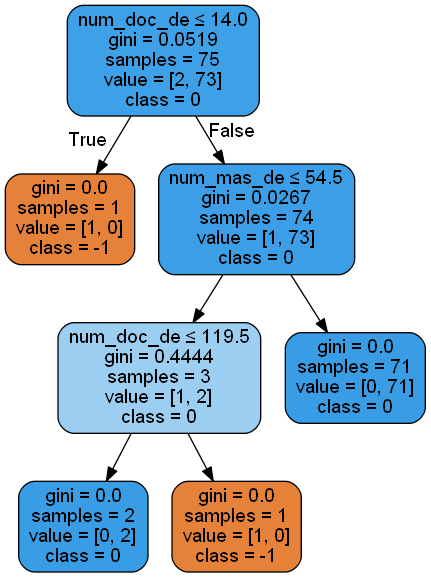

In [59]:
dependent = 'u_s_cluster_kmeans_bin'

# Building decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(cols, usa_bias_analysis[dependent])

# Plotting decision tree
dot_data = tree.export_graphviz(clf, out_file='bias.dot',
                    feature_names = np.array(cols.columns, dtype='<U10'), 
                    class_names = np.array(imps, dtype='<U10'),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_file('bias.dot') 
graph.write_pdf("plot_analysis_dt3.pdf")
os.unlink('bias.dot')
Image(graph.create_png())